<a href="https://colab.research.google.com/github/asmundur/Projects/blob/master/coco_text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Demo for the COCO-Text data API 

In this demo, we will learn how to load the COCO-Text data using the python API.

Let's first import the `coco_text` tool API package. 

In [0]:
from google.colab import auth
from googleapiclient.http import MediaIoBaseDownload
from googleapiclient.discovery import build
auth.authenticate_user()
drive_service = build('drive', 'v3')
import os, io

to_download = ['coco-text-master.zip',
               'cocotext.v2.zip',
               'convert_to_pascalformat.py']
for item in to_download:
    filename = item
    results = drive_service.files().list(q="name = '{}'".format(filename), fields="files(id)").execute()
    print(filename)
    print(results)
    file_id = (results.get('files', [])[0]).get('id')
    print(file_id)

    request = drive_service.files().get_media(fileId=file_id)
    fh = io.FileIO(filename, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100)) 
    # !tar -zxvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

!unzip -qq -o coco-text-master.zip
!unzip -qq -o cocotext.v2.zip


coco-text-master.zip
{'files': [{'id': '1J0jEVdhnlKBdl8AbvCpwOPcwy_X65Lfe'}]}
1J0jEVdhnlKBdl8AbvCpwOPcwy_X65Lfe
Download 100%.
cocotext.v2.zip
{'files': [{'id': '1zBFUxN38Y2rRb3svpUb5dxmzmlhz9v-v'}]}
1zBFUxN38Y2rRb3svpUb5dxmzmlhz9v-v
Download 100%.
convert_to_pascalformat.py
{'files': [{'id': '11cRiqJK-qZCnX_RIaVnMoPVnHtYxjC8e'}]}
11cRiqJK-qZCnX_RIaVnMoPVnHtYxjC8e
Download 100%.


In [0]:
!mv coco-text-master/* .
# !mv COCO_Text/* .

import coco_text

Make sure that you have downloaded the annotation file from the website.

Once downloaded, you can import the annotations in the following way:

In [0]:
ct = coco_text.COCO_Text('cocotext.v2.json')

loading annotations into memory...
0:00:01.897555
creating index...
index created!


Now, lets use the API. First, the API offers some basic infos of the dataset.

In [0]:
ct.info()

### Select annotations and images based on filter criteria

Let's retrieve some images. We want to get a list of all image ids from the training set, where the image contains at least one text instance that is legilbe and is machine printed.

In [0]:
imgs = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible'),('class','machine printed')])

In [0]:
len(imgs)

13880

Let's now go on to the annotations. We want to get a list of all annotation ids from the validation set that are legible, machine printed and have an area between 0 and 200 pixels.

In [0]:
anns = ct.getAnnIds(imgIds=ct.val, 
                        catIds=[('legibility','legible'),('class','machine printed')], 
                        areaRng=[0,200])

# 2 Visualize COCOText Annotations

In order to visualize the COCO Text annotations, please make sure to download the COCO Images from the MSCOCO website: http://mscoco.org/dataset/#download 

In [0]:
# !pip install wget
# import wget
url = "http://images.cocodataset.org/zips/train2014.zip"
!wget $url

--2019-12-05 00:06:02--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.145.27
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.145.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  44.8MB/s    in 5m 0s   

2019-12-05 00:11:03 (42.9 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [0]:
# url = 'http://images.cocodataset.org/zips/val2017.zip'
# wget.download(url, '.')
# url = 'http://images.cocodataset.org/zips/test2017.zip'
# wget.download(url, '.')
!unzip -qq train2014.zip 2>/dev/null
# !unzip -qq val2017.zip 2>/dev/null
# !unzip -qq test2017.zip 2>/dev/null

After downloading the images, specify the path to the MSCOCO image data.

In [0]:
dataDir='.'
dataType='train2014'

Lets now import some useful tools to visualize the COCO images and annotations

In [0]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Using the API introduced above, lets select an image that has at least one instance of legible text.

In [0]:
# get all images containing at least one instance of legible text
imgIds = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible')])
# pick one at random
img = ct.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

We can now load the image

train2014/COCO_train2014_000000273371.jpg
train2014/COCO_train2014_000000273371.jpg


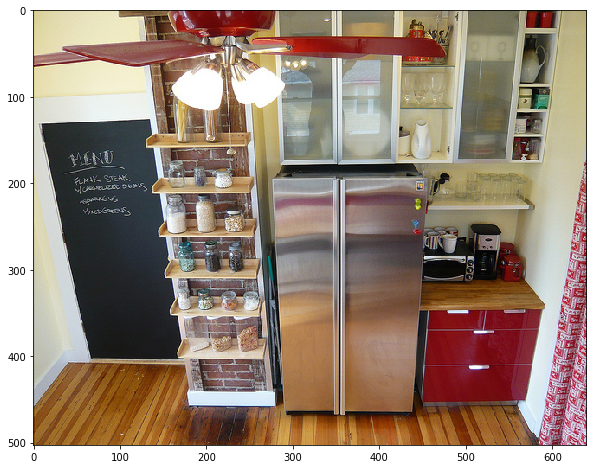

In [0]:
img_file = img['file_name']

img_name = '{}/{}'.format(dataType,img_file)
print(img_name)
I = io.imread(img_name)
print('{}/{}'.format(dataType,img['file_name']))
plt.figure()
plt.imshow(I)

Lastly, we can load and display the text annotations

[{'mask': [39.7, 165.0, 44.2, 183.9, 93.1, 178.8, 94.2, 160.5], 'class': 'machine printed', 'bbox': [39.7, 160.5, 54.5, 23.4], 'image_id': 273371, 'id': 69074, 'language': 'english', 'area': 969.78, 'utf8_string': 'MENU', 'legibility': 'legible'}, {'mask': [45.7, 193.1, 47.7, 203.8, 80.2, 200.0, 75.1, 189.7], 'class': 'machine printed', 'bbox': [45.7, 189.7, 34.5, 14.1], 'image_id': 273371, 'id': 69075, 'language': 'english', 'area': 337.76, 'utf8_string': 'FLANK', 'legibility': 'legible'}, {'mask': [80.2, 190.8, 85.0, 199.5, 115.4, 198.9, 109.0, 188.6], 'class': 'machine printed', 'bbox': [80.2, 188.6, 35.2, 10.9], 'image_id': 273371, 'id': 69076, 'language': 'english', 'area': 289.04, 'utf8_string': 'STEAK', 'legibility': 'legible'}, {'mask': [51.9, 214.8, 54.1, 226.8, 65.4, 226.1, 100.0, 222.3, 94.2, 214.1], 'class': 'machine printed', 'bbox': [51.9, 214.1, 48.1, 12.7], 'image_id': 273371, 'id': 69077, 'language': 'english', 'area': 465.17, 'utf8_string': '', 'legibility': 'illegibl

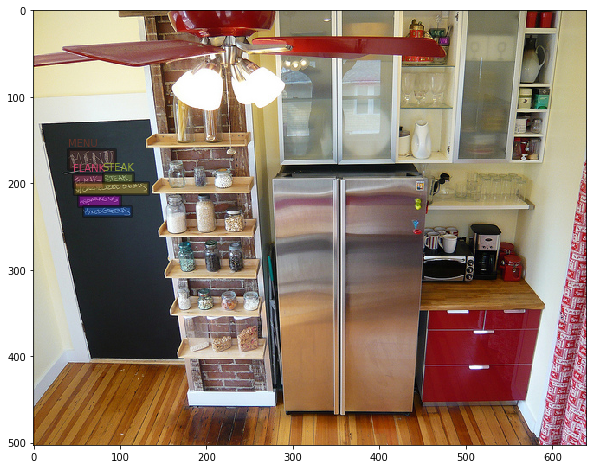

In [0]:
# load and display text annotations
plt.imshow(I)
annIds = ct.getAnnIds(imgIds=img['id'])
anns = ct.loadAnns(annIds)
print(anns)
ct.showAnns(anns)

# 3 Demo for the COCO-Text evaluation API

In this demo we will learn how to use the COCO-Text evaluation API to evaluate text detection and recognition results.

First, let's import the `coco_text_evaluation` API.  

In [0]:
import coco_evaluation

Next, we have to load our recognition results. For this we can use the `loadRes()` function from the `coco_text` tool.

The results have to be saved in the format explained on the website. The '`our_results.json`' file gives an example. Generally, the detections are saved in a json file and form a list of dictionaries like the following:

    [{"image_id": int,
      "bbox": [left, top, width, height],
      "utf8_string": string"},
      {}...]

Then, we can load the results like this:

In [0]:
our_results = ct.loadRes('our_results.json')

Loading and preparing results...     
Results do not correspond to current coco set
skipping  1  images
DONE (t=0.02s)


If the results file contains annotations for images not in the current version of COCO-Text, the loader will notify
that some images are skipped and then ignore the respective annotations. This happens for example, if results for the test set are included in the same file.

### Detection results

Once the resutls are loaded, the evalution tool allows to compute the successful detections with the '`getDetections()`' function. The `detection_threshold` parameter defines how closely the bounding boxes need to overlap. The default value is an Intersection over Union (IoU) score of 0.5. 

In [0]:
our_detections = coco_evaluation.getDetections(ct, our_results, detection_threshold = 0.5)

The detection results comprise three lists: True Positives, False Positives and False Negatives.

In [0]:
print('True positives have a ground truth id and an evaluation id: ', our_detections['true_positives'][0])
print('False positives only have an evaluation id: ', our_detections['false_positives'][0])
print('True negatives only have a ground truth id: ', our_detections['false_negatives'][0])

True positives have a ground truth id and an evaluation id:  {'gt_id': 158802, 'eval_id': 0}
False positives only have an evaluation id:  {'eval_id': 7}
True negatives only have a ground truth id:  {'gt_id': 40555}


### End-to-end results

Let's look into the transcription performance now. For that we ue the '`evaluateTranscription()`' function. And provide our results and detections.

In [0]:
our_endToEnd_results = coco_evaluation.evaluateEndToEnd(ct, our_results, detection_threshold = 0.5)

Now we are ready to see the results. For that we can use the '`printDetailedResults()`' function. The last line can be used to create a table as shown in the paper.

In [0]:
coco_evaluation.printDetailedResults(ct,our_detections,our_endToEnd_results,'our approach')

our approach

Detection
Recall
legible & machine printed:  0.01
legible & handwritten:  0
legible overall:  0.01
illegible & machine printed:  0.00
illegible & handwritten:  0
illegible overall:  0.00
total recall:  0.0
Precision
total precision:  50.00
f-score
f-score localization:  0.01

Transcription
accuracy for exact matches:  0.00
accuracy for matches with edit distance<=1:  100.00

End-to-end
recall:  0.00 precision:  0.00
End-to-end f-score:  0

0.01 & 0 & 0.00 & 0 & 0.0 & 50.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0


In [0]:
# !wget https://github.com/tylin/coco-dpm/blob/master/coco/convert_to_pascalformat.py

--2019-12-05 00:39:39--  https://drive.google.com/file/d/11cRiqJK-qZCnX_RIaVnMoPVnHtYxjC8e/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  67.65K  --.-KB/s    in 0.04s   

2019-12-05 00:39:39 (1.54 MB/s) - ‘view?usp=sharing’ saved [69278]



In [0]:
print(img)

{'id': 389280, 'set': 'train', 'width': 640, 'file_name': 'COCO_train2014_000000389280.jpg', 'height': 480}


In [0]:
!echo $img

{id: 389280, set: train, width: 640, file_name: COCO_train2014_000000389280.jpg, height: 480}


In [0]:
!python convert_to_pascalformat.py . train2014

loading annotations into memory...
Done (t=1.84s)
creating index...
index created!
Traceback (most recent call last):
  File "convert_to_pascalformat.py", line 57, in <module>
    main()
  File "convert_to_pascalformat.py", line 23, in main
    cats = coco.loadCats(catIds)
  File "/usr/local/lib/python3.6/dist-packages/pycocotools/coco.py", line 218, in loadCats
    return [self.cats[id] for id in ids]
  File "/usr/local/lib/python3.6/dist-packages/pycocotools/coco.py", line 218, in <listcomp>
    return [self.cats[id] for id in ids]
KeyError: ('legibility', 'legible')


In [0]:
def convert_to_pascal_format():
    # if len(sys.argv) != 3:
    # 	print('usage: python convert_to_pascalformat.py coco_dataDir coco_dataType')
    # 	print('for example: python convert_to_pascalformat.py \'./\' \'val2014\'')
    # 	sys.exit(1)

    dataDir = '.'
    dataType = 'train2014'

    # from pycocotools.coco import COCO
    import os
    annFile='{}/cocotext.v2.json'.format(dataDir)
    catIds=[('legibility','legible'),('class','machine printed')]
    # catIds = [('legibility','legible'),('class','machine printed')]
    # print('hm')
    coco = coco_text.COCO_Text('cocotext.v2.json')

    # cats = coco.loadCats(catIds)

    # nms=[cat['name'] for cat in cats]

    imgIds = coco.getImgIds()

    directory = './annotations_pascalformat/'
    if not os.path.exists(directory):
        os.makedirs(directory)

    for n in range(len(imgIds)):
        img = coco.loadImgs(imgIds[n])[0]
        annIds = coco.getAnnIds(imgIds=img['id'])
        anns = coco.loadAnns(annIds)

        xml = '<annotation>\n<folder>\nCOCO2014pascalformat\n</folder>\n<filename>\n'
        xml += img['file_name'] + '\n</filename>\n<source>\n<database>\nCOCO2014pascalformat\n</database>\n</source>\n<size>\n'
        xml += '<width>\n' + str(img['width']) + '\n</width>\n' + '<height>\n' + str(img['height']) + '\n</height>\n'
        xml += '<depth>\n3\n</depth>\n</size>\n<segmented>\n0\n</segmented>\n'

        for i in range(len(anns)):
            bbox = anns[i]['bbox']
            # xml += '<object>\n<name>\n' + str(anns[i]['category_id']) + '\n</name>\n'
            xml += '<object>\n<name>\n' + 'machine legible' + '\n</name>\n'
            xml += '<bndbox>\n<xmin>\n' + str(int(round(bbox[0]))) + '\n</xmin>\n'
            xml += '<ymin>\n' + str(int(round(bbox[1]))) + '\n</ymin>\n'
            xml += '<xmax>\n' + str(int(round(bbox[0] + bbox[2]))) + '\n</xmax>\n'
            xml += '<ymax>\n' + str(int(round(bbox[1] + bbox[3]))) + '\n</ymax>\n</bndbox>\n'
            xml += '<truncated>\n0\n</truncated>\n<difficult>\n0\n</difficult>\n</object>\n'
        xml += '</annotation>'
        f_xml = open(directory + img['file_name'].split('.jpg')[0] + '.xml', 'w')
        f_xml.write(xml)
        f_xml.close()
        if n % 1000 == 0:
            print(str(n) + ' out of ' + str(len(imgIds)))

In [93]:
rm -r annotations_pascalformat
convert_to_pascal_format()

loading annotations into memory...
0:00:01.736350
creating index...
index created!
0 out of 53686
1000 out of 53686
2000 out of 53686
3000 out of 53686
4000 out of 53686
5000 out of 53686
6000 out of 53686
7000 out of 53686
8000 out of 53686
9000 out of 53686
10000 out of 53686
11000 out of 53686
12000 out of 53686
13000 out of 53686
14000 out of 53686
15000 out of 53686
16000 out of 53686
17000 out of 53686
18000 out of 53686
19000 out of 53686
20000 out of 53686
21000 out of 53686
22000 out of 53686
23000 out of 53686
24000 out of 53686
25000 out of 53686
26000 out of 53686
27000 out of 53686
28000 out of 53686
29000 out of 53686
30000 out of 53686
31000 out of 53686
32000 out of 53686
33000 out of 53686
34000 out of 53686
35000 out of 53686
36000 out of 53686
37000 out of 53686
38000 out of 53686
39000 out of 53686
40000 out of 53686
41000 out of 53686
42000 out of 53686
43000 out of 53686
44000 out of 53686
45000 out of 53686
46000 out of 53686
47000 out of 53686
48000 out of 53686

In [0]:
!ls train2014 > out

In [0]:
!head out

COCO_train2014_000000000009.jpg
COCO_train2014_000000000025.jpg
COCO_train2014_000000000030.jpg
COCO_train2014_000000000034.jpg
COCO_train2014_000000000036.jpg
COCO_train2014_000000000049.jpg
COCO_train2014_000000000061.jpg
COCO_train2014_000000000064.jpg
COCO_train2014_000000000071.jpg
COCO_train2014_000000000072.jpg


In [0]:
!tail out

COCO_train2014_000000581880.jpg
COCO_train2014_000000581881.jpg
COCO_train2014_000000581882.jpg
COCO_train2014_000000581884.jpg
COCO_train2014_000000581900.jpg
COCO_train2014_000000581903.jpg
COCO_train2014_000000581904.jpg
COCO_train2014_000000581906.jpg
COCO_train2014_000000581909.jpg
COCO_train2014_000000581921.jpg


In [94]:
#000000273371
!cat annotations_pascalformat/COCO_train2014_000000273371.xml

<annotation>
<folder>
COCO2014pascalformat
</folder>
<filename>
COCO_train2014_000000273371.jpg
</filename>
<source>
<database>
COCO2014pascalformat
</database>
</source>
<size>
<width>
640
</width>
<height>
503
</height>
<depth>
3
</depth>
</size>
<segmented>
0
</segmented>
<object>
<name>
machine legible
</name>
<bndbox>
<xmin>
40
</xmin>
<ymin>
160
</ymin>
<xmax>
94
</xmax>
<ymax>
184
</ymax>
</bndbox>
<truncated>
0
</truncated>
<difficult>
0
</difficult>
</object>
<object>
<name>
machine legible
</name>
<bndbox>
<xmin>
46
</xmin>
<ymin>
190
</ymin>
<xmax>
80
</xmax>
<ymax>
204
</ymax>
</bndbox>
<truncated>
0
</truncated>
<difficult>
0
</difficult>
</object>
<object>
<name>
machine legible
</name>
<bndbox>
<xmin>
80
</xmin>
<ymin>
189
</ymin>
<xmax>
115
</xmax>
<ymax>
200
</ymax>
</bndbox>
<truncated>
0
</truncated>
<difficult>
0
</difficult>
</object>
<object>
<name>
machine legible
</name>
<bndbox>
<xmin>
52
</xmin>
<ymin>
214
</ymin>
<xmax>
100
</xmax>
<ymax>
227
</ymax>
</bndbox

In [108]:
!rm -r models
!git clone https://github.com/tensorflow/models.git



Cloning into 'models'...
remote: Enumerating objects: 33044, done.
remote: Total 33044 (delta 0), reused 0 (delta 0), pack-reused 33044
Receiving objects: 100% (33044/33044), 511.83 MiB | 43.13 MiB/s, done.
Resolving deltas: 100% (21060/21060), done.
Checking out files: 100% (3183/3183), done.


In [109]:
!rm -r cocoapi
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (570/570), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages

In [115]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim


env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [124]:
# !wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
# !unzip protobuf.zip
# !cp -r models/research/object_detection ./object_detection


!cd models/research; pwd; protoc object_detection/protos/*.proto --python_out=.; python object_detection/builders/model_builder_test.py




/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models

In [125]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-12-05 03:18:35--  http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   160MB/s    in 0.9s    

2019-12-05 03:18:37 (160 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_c

In [0]:
!cat faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config > tmp.sh

In [0]:
!cat tmp.sh > models/research/object_detection/models/faster_rcnn_inception_v2_coco.config

In [0]:
!cd models/research; chmod a-x train_text.sh ./train_text.sh